# 2.18 Programming for Geoscientists class test 2016 - Solutions

**1.** The following cells contain at least one programming bug each. For each cell add a comment to identify and explain the bug, and correct the program.

In [1]:
# Function to calculate wave velocity.
def wave_velocity(k, mu, rho):
    vp = sqrt((k+4*mu/3)/rho)
    
    return vp

# Use the function to calculate the velocity of an
# acoustic wave in water.
vp = wave_velocity(k=0, mu=2.29e9, rho=1000)

NameError: name 'sqrt' is not defined

The error here says that Python does not know what `sqrt` means, it is not part of its standard keywords. You need to import a library that defines it in order to use it, in this case the `math` library.

In [2]:
import math

# Function to calculate wave velocity.
def wave_velocity(k, mu, rho):
    vp = math.sqrt((k+4*mu/3)/rho)
    
    return vp

# Use the function to calculate the velocity of an
# acoustic wave in water.
vp = wave_velocity(k=0, mu=2.29e9, rho=1000)

In [3]:
print "Velocity of acoustic wave in water: %d", vp

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-eb47887afae1>, line 1)

Two (or three) errors here: print is a function and needs to be called with brackets. Besides, the right hand side of a formatted print statement begins with a `%` symbol and not a comma. Finally, `vp` is a float, and would usually be printed with `%f` instead of `%d`, which is used to print integers. 

In [4]:
print("Velocity of acoustic wave in water: %f" % vp)

Velocity of acoustic wave in water: 1747.378990


In [5]:
data = (3.14, 2.29, 10, 12)
data.append(4)

AttributeError: 'tuple' object has no attribute 'append'

By using brackets, you define a **tuple**. A tuple is a data type that cannot be modified once created. If you want to change the data, including append an element, you need to use a **list**, which you can initialize with square brackets.

In [6]:
data = [3.14, 2.29, 10, 12]
data.append(4)

In [7]:
line = "2015-12-14T06:29:15.740Z,19.4333324,-155.2906647,1.66,2.14,ml,17,248,0.0123,0.36,hv,hv61126056,2015-12-14T06:34:58.500Z,5km W of Volcano, Hawaii,earthquake"
latitude = line.split(',')[1]
longitude = line.split(',')[2]
print "longitude, latitude = (%g, %g)"%(longitude, latitude)

SyntaxError: invalid syntax (<ipython-input-7-c99a8d99a836>, line 4)

There is first a bracket problem when doing the print:

In [8]:
line = "2015-12-14T06:29:15.740Z,19.4333324,-155.2906647,1.66,2.14,ml,17,248,0.0123,0.36,hv,hv61126056,2015-12-14T06:34:58.500Z,5km W of Volcano, Hawaii,earthquake"
latitude = line.split(',')[1]
longitude = line.split(',')[2]
print("longitude, latitude = (%g, %g)"%(longitude, latitude))

TypeError: must be real number, not str

Now the problem is that `%g` can only print a number, but `longitude` and `latitude` are strings. This can be solved either by converting these two variables into floating point numbers, or by using `%s` to print them.

In [9]:
line = "2015-12-14T06:29:15.740Z,19.4333324,-155.2906647,1.66,2.14,ml,17,248,0.0123,0.36,hv,hv61126056,2015-12-14T06:34:58.500Z,5km W of Volcano, Hawaii,earthquake"
latitude = line.split(',')[1]
longitude = line.split(',')[2]
print("longitude, latitude as strings = (%s, %s)"%(longitude, latitude))
print("longitude, latitude as floats = (%g, %g)"%(float(longitude), float(latitude)))

longitude, latitude as strings = (-155.2906647, 19.4333324)
longitude, latitude as floats = (-155.291, 19.4333)


**2.** The Ricker wavelet is frequently employed to model seismic data. The amplitude of the Ricker wavelet with peak frequency $f$ at time $t$ is computed as:

$$A = (1-2 \pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}$$

* Implement a function which calculates the amplitude of the Ricker wavelet for a given peak frequency $f$ and time $t$.
* Use a *for loop* to create a python *list* for time ranging from $-0.5$ to $0.5$, using a peak frequency, $f$, of $10$.
* Using the function created above, calculate a numpy array of the Ricker wavelet amplitudes for these times.
* Plot a graph of time against Ricker wavelet.

Populating the interactive namespace from numpy and matplotlib


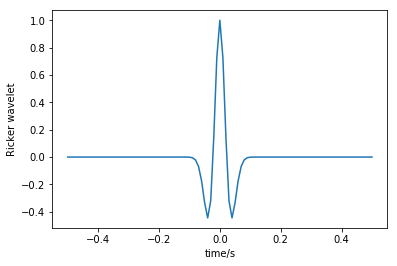

In [10]:
# import the necessary modules. 
#Reminder: the following line imports numpy and the plotting modules
%pylab inline

# create a function that calculates the amplitude of the wavelet
# this function takes two arguments: f and t
def ricker_wavelet(f, t):
    A1 = (1 - 2*pi**2 * f**2 * t**2)
    A2 = exp(-pi**2 * f**2 * t**2)
    return A1*A2

# create a list containing 101 values between -0.5 and 0.5 included
# NB the wording is a bit ambiguous, and a list spaced with 1/f=0.1 (ie 11 value) 
#    would have been accepted even if the plot is less accurate
time_list = []
for i in range(0,101):
    t=-0.5+(i*0.01)
    time_list.append(t)
    
# convert the list into a numpy array
time_array = np.array(time_list)
f = 10
# call the previous function in a vectorized way
amplitudes = ricker_wavelet(f, time_array)

# plot the previous arrays
plot(time_array ,amplitudes)
xlabel("time/s")
ylabel("Ricker wavelet")
show()

**3.** The data file [vp.dat](data/vp.dat) (all of the data files are stored in the sub-folder *data/* of this notebook library) contains a profile of the acoustic velocity with respect to depth. Depth is measured with respect to a reference point; therefore the first few entries contain NaN's indicating that they are actually above ground.

* Write a function to read in the depth and acoustic velocity.
* Ensure you skip the entries that contain NaN's.
* Store depth and velocities in two seperate numpy arrays.
* Plot depth against velocity ensuring you label your axis.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


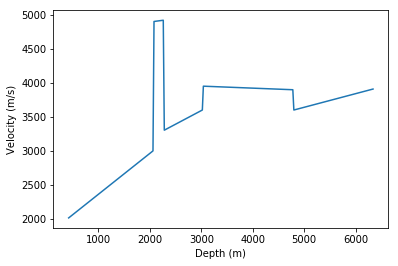

In [11]:
%pylab inline

# write a function to read the file
def read_file(filename):

    #read the file
    infile=open(filename,"r")

    # first, store the data in lists, as it is easier to append elements
    # create empty lists
    depth_list = []
    velocity_list = []
    
    # loop over the lines of the file
    for line in infile:
        # the try/except catches lines that are not made of 2 numbers
        try:
            words = line.split()
            # catch NaNs
            if words[1]=="nan":
                continue

            depth_list.append(float(words[0]))
            velocity_list.append(float(words[1]))
        except:
            continue
            
    # close the file
    infile.close()

    # then, convert lists into numpy arrays
    depth_array = array(depth_list)
    velocity_array = array(velocity_list)
    
    return depth_array, velocity_array
    
# run the function on the correct file
depth, velocity = read_file("data/vp.dat")

# plot and decorate the plot
plot(depth, velocity)
xlabel("Depth (m)")
ylabel("Velocity (m/s)")
show()

**4.** The file [BrachiopodBiometrics.csv](data/BrachiopodBiometrics.csv) contains the biometrics of Brachiopods found in 3 different locations.

* Read the data file into a Python *dictionary*.
* You should use the samples location as the *key*.
* For each key you should form a Python *list* containing tuples of *length* and *width* of each sample.
* For each location, calculate the mean length and width of the samples.
* Print the result for each location using a formatted print statement. The mean values should only be printed to within one decimal place.

In [12]:
# open file
infile = open("data/BrachiopodBiometrics.csv","r")

# create an empty dictionary
brachiopods_biometrics = {}

# loop over the lines of the file
for line in infile:

    # I. first, analyze the line
    try:
        words = line.split(",")
        location = words[0]
        # lines like the first line will raise an exception here...
        length = float(words[1])
        width = float(words[2])
    except:
        # ... and be ignored
        continue
    
    # II. then put the data into the appropriate data structure
    # if the key is not already in the dictionary, 
    # create an entry in the dictionary with a key/value pair: location/empty list
    if location not in brachiopods_biometrics:
        brachiopods_biometrics[location] = []
    # there is now always already a list as a value corresponding to the key,
    # we can append a tuple (length, width)
    brachiopods_biometrics[location].append((length, width))
    
# close the file when we are done using it
infile.close()

# Loop over the locations to compute the average widths and length
for location in brachiopods_biometrics:
    # initialize the averages with 0
    avg_length = 0;
    avg_width = 0;
    # at this stage, for each location, the dictionary contains a list of tuples
    sample_list = brachiopods_biometrics[location]
    # loop over this list: each element of the list is a tuple (length, width)
    for sample in sample_list:
        # add the contribution of each sample to the average
        avg_length += sample[0]
        avg_width += sample[1]
    
    # finalize the average
    num_samples = len(brachiopods_biometrics[location])
    avg_length /= num_samples 
    avg_width /= num_samples
    
    # print it with a formatted print
    print("At %15s, the average length is: %.1f and the average width is: %.1f" %(location, avg_length, avg_width))
    

At Harper's Quarry, the average length is: 3.2 and the average width is: 3.2
At Pen Cerrig Wood, the average length is: 3.3 and the average width is: 3.2
At   Rorrington Fm, the average length is: 4.0 and the average width is: 3.7
